In [50]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.special as sp

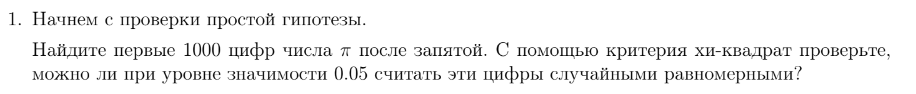

# 1)

[ 93. 116. 103. 102.  93.  97.  94.  95. 101. 106.]
Хи-квадрат статистика: 4.739999999999999
Количество степеней свободы: 9
Критическое значение для уровня значимости 0.05: 16.918977604620448
Можно ли считать цифры числа π после запятой случайными равномерными при уровне значимости 0.05: True


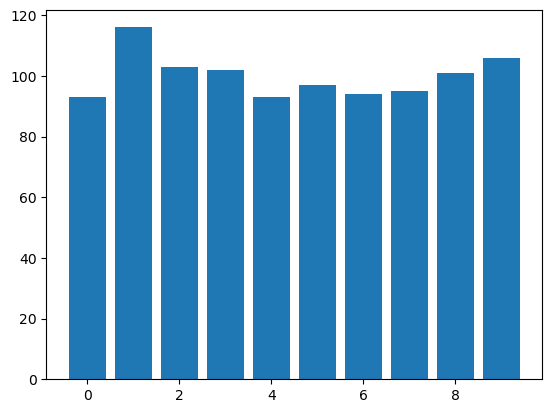

In [39]:
from mpmath import mp
mp.dps = 1000
num1 = mp.pi
num2 = num1 - np.floor(num1)
num2 *= 10
digits = [0,1,2,3,4,5,6,7,8,9]
hypothesis = [100 for i in range(10)]
counters = np.zeros(10)
for i in range (1000):
    counters[int(np.floor(num2))] +=1
    num1 = num2
    num2 = num1 - np.floor(num1)
    num2 *= 10
print(counters)
plt.bar(digits, counters)
ddof = 9
chisq, pvalue = sts.chisquare(f_obs=counters, f_exp=hypothesis, ddof = ddof)

critical_value = sts.chi2.ppf(0.95, df=ddof)

is_uniform = chisq < critical_value

print("Количество степеней свободы:", ddof)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать цифры числа π после запятой случайными равномерными при уровне значимости 0.05:", is_uniform)


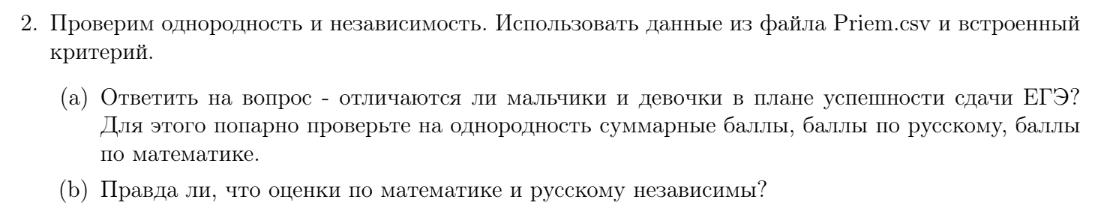

# 2) 

In [51]:
df = pd.read_csv('Priem.csv')
df.head()

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения
0,МУЖСКОЙ,388,90.0,98.0,5,0,1,Красноярский край,ГОРОД,24.09.1998,24,9
1,ЖЕНСКИЙ,351,84.0,87.0,0,0,2,Чувашская Респ,ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ,14.02.1997,14,2
2,ЖЕНСКИЙ,355,94.0,91.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,25.03.2000,25,3
3,ЖЕНСКИЙ,338,76.0,88.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,19.11.1999,19,11
4,МУЖСКОЙ,349,82.0,93.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,12.12.1999,12,12


In [56]:


cut_bins = [0, 70, 80, 90, 100]
cut_bins_sum = [0, 140, 160, 180, 200]
df['Sum'] = df['ЕГЭ...рус.яз.'] + df['ЕГЭ...матем.']

df1 = df[df['Пол'] == 'ЖЕНСКИЙ']
df2 = df[df['Пол'] == 'МУЖСКОЙ']


count_female_rus = df1.groupby(pd.cut(df1['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
count_female_math = df1.groupby(pd.cut(df1['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()
count_female_avg = df1.groupby(pd.cut(df1['Sum'], bins=cut_bins_sum))['Sum'].count().to_numpy()

count_male_rus = df2.groupby(pd.cut(df2['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
count_male_math = df2.groupby(pd.cut(df2['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()
count_male_avg = df2.groupby(pd.cut(df2['Sum'], bins=cut_bins_sum))['Sum'].count().to_numpy()


table = np.array([count_female_rus, count_male_rus])
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")

critical_value = 0.05
homogeneity = pvalue > critical_value

print("хи-квадрат для русского языка:")
print("Можно ли считать однородными результаты по русскому языку:", homogeneity)
print("\n")
print('#######')

table = np.array([count_female_math, count_male_math])
pvalue = sts.chi2_contingency(table).pvalue

print(f"p-value: {pvalue}")
homogeneity2 = pvalue > critical_value

print("Результаты теста хи-квадрат для математики:")
print("Можно ли считать однородными результаты по математике:", homogeneity2)
print("\n")
print('#######')

table = np.array([count_female_avg, count_male_avg])
pvalue = sts.chi2_contingency(table).pvalue

print(f"p-value: {pvalue}")
homogeneity3 = pvalue > critical_value

print("Результаты теста хи-квадрат для суммарных баллов:")
print("Можно ли считать однородными суммарные результаты:", homogeneity3)
print("\n")
print('#######')

df_test_1 = df.groupby(pd.cut(df['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
df_test_2 = df.groupby(pd.cut(df['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()

table = np.array([df_test_1, df_test_2])
pvalue = sts.chi2_contingency(table).pvalue

print(f"p-value: {pvalue}")
test = pvalue > critical_value
print("Результаты теста хи-квадрат для независимости:")
print("Можно ли считать результаты независимыми:", test)

p-value: 1.786770121758677e-15
хи-квадрат для русского языка:
Можно ли считать однородными результаты по русскому языку: False


#######
p-value: 0.6108444846057453
Результаты теста хи-квадрат для математики:
Можно ли считать однородными результаты по математике: True


#######
p-value: 2.0998881447778616e-05
Результаты теста хи-квадрат для суммарных баллов:
Можно ли считать однородными суммарные результаты: False


#######
p-value: 9.561716545330092e-18
Результаты теста хи-квадрат для независимости:
Можно ли считать результаты независимыми: False


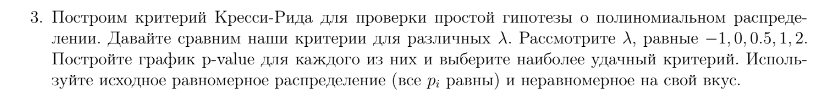

# 3)

'nonuniform_dist = np.array([0.1,0.1,0.15,0.05,0.1,0.1,0.05,0.1,0.1,0.15])\nexp2 = n*nonuniform_dist\n\nfig, ax = plt.subplots()\nplt.title("nonuniform")\nfor lambda_test in L:\n    m = 100\n    result = []\n    for j in range (m):\n        sample2 = sts.multinomial.rvs(n, nonuniform_dist)\n        statistic, pvalue = sts.power_divergence(sample2, f_exp = exp1, lambda_=lambda_test)\n        result = np.append(result, pvalue)\n    result = np.sort(result)\n    y_vals = [(i+1)/m for i in range(m)]\n    ax.plot(result, y_vals, lw = 2, label = f"λ = {lambda_test}")\nplt.legend()'

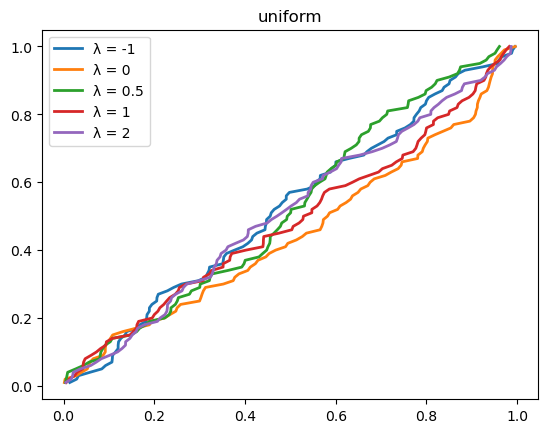

In [96]:
L = [-1, 0, 0.5, 1, 2]
n = 10000
uniform_dist = np.array([1/10 for i in range (10)])
exp1 = n*uniform_dist

fig, ax = plt.subplots()
plt.title("uniform")
for lambda_test in L:
    m = 100
    result = []
    for j in range (m):
        sample1 = sts.multinomial.rvs(n, uniform_dist)
        statistic, pvalue = sts.power_divergence(sample1, f_exp=exp1, lambda_=lambda_test)
        result = np.append(result, pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2, label = f"λ = {lambda_test}")
plt.legend()

'''nonuniform_dist = np.array([0.1,0.1,0.15,0.05,0.1,0.1,0.05,0.1,0.1,0.15])
exp2 = n*nonuniform_dist

fig, ax = plt.subplots()
plt.title("nonuniform")
for lambda_test in L:
    m = 100
    result = []
    for j in range (m):
        sample2 = sts.multinomial.rvs(n, nonuniform_dist)
        statistic, pvalue = sts.power_divergence(sample2, f_exp = exp1, lambda_=lambda_test)
        result = np.append(result, pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2, label = f"λ = {lambda_test}")
plt.legend()'''

In [97]:
n = 50
def nonuni(n:int, lambd:float):
    m = 200
    result1 = []
    for j in range (m):
        X = [0.1,0.05,0.15,0.2,0.1,0.05,0.15,0.1,0.1]
        Y = sts.multinomial.rvs(n, X)
        sample_val = sts.power_divergence(Y, lambda_ = lambd)
        result1 = np.append(result1, sample_val[1])
    result1 = np.sort(result1)
    y_vals = [(i+1)/m for i in range(m)]
    plt.title(f"p-value для неравномерного р-ия n = {n}")
    ax.plot(result1, y_vals, label = f"lambda = {lambd}", lw = 2)

y_vals = [(i+1)/100 for i in range(100)]

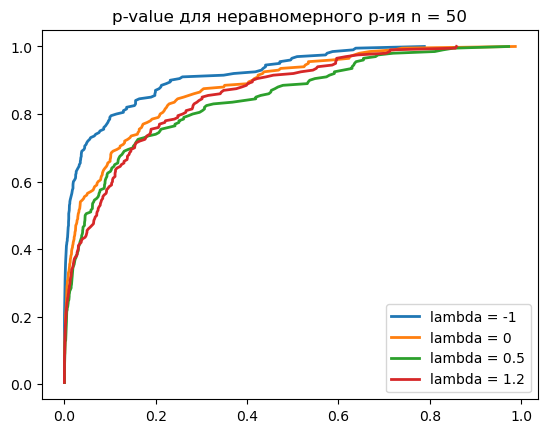

In [98]:
fig,ax = plt.subplots()
for lambd in [-1,0,0.5,1.2]:
    nonuni(n, lambd)
plt.legend()